#BARAKAT Khalid

##TP 5 ARV

#Headers

In [0]:
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt

#Transformer QNL 1D

In [0]:
def downsizing(u):
  m = int(np.floor(len(u)/2))
  v = np.zeros((m),float)
  v[0:m] = (u[0:2*m-1:2] + u[1:2*m:2])/2
  return v

#Détails

def upsizingQN(v,uM):
    m = (len(v))//2
    g = np.zeros((m))
    c = np.zeros((m))
    d = np.zeros((m))
    concat = np.concatenate((uM,uM))
    res = np.zeros((m))
    if m > 1 :
        g[0:m] = np.absolute(concat[(m-2)%(2*m):(2*m-2)%(2*m)] - concat[(m-1)%(2*m):(2*m-1)%(2*m)]) + np.absolute(concat[(m-1)%(2*m):(2*m-1)%(2*m)] - concat[m%(2*m):(2*m)])
        c[0:m] = np.absolute(concat[(m-1)%(2*m):(2*m-1)%(2*m)] - concat[m:2*m]) + np.absolute(concat[0:m] - concat[1:m+1])
        d[0:m] = np.absolute(concat[0:m] - concat[1:m+1]) + np.absolute(concat[1:m+1] - concat[2:m+2])
    y = np.zeros((m))
    for i in range(m):
        if g[i] < c[i] and g[i] < d[i]:
            y[i] =  (uM[i]*(5/8)) + (uM[( i-1)%m]/2) -(uM[(i-2)%m]/8)
        elif d[i] < c[i] and d[i] < g[i]:
            y[i] = (uM[i]*(11/8)) - (uM[(i+1)%m]/2) + (uM[(i+2)%m]/8)
        else: 
            y[i] = uM[i] - (uM[(i-1)%m] - uM[(i+1)%m])/8
    res[0:m] = v[0:2*m:2] - y[0:m] 
    return res
  

### Fonction Directe
def QNLPerDir(X):
        if len(X) == 1 :
            return X #Cas d'arrÃªt : si la taille de la liste=1, on renvoi celle-ci
        else :
            ds = downsizing(X) # Calcule des moyennes
            us = upsizingQN(X,ds) # Calcule des dÃ©tails
            return np.concatenate((QNLPerDir(ds),us)) # On rappelle la fonction avec les moyennes.

def QNLPerInv(x):
  n=1
  i=1 
  x2 = np.copy([x[0]])  
  m = len(x)
  while(n<= m/2):
      concat = np.concatenate((x2,x2))
      x1b=np.zeros((n))
      x1p=np.zeros((n))
      x1=np.zeros((2*n))
      g = np.zeros((n)) 
      c = np.zeros((n)) 
      d = np.zeros((n)) 
      if n > 1 :
          p = 2*n
          g[0:n] = np.abs(concat[(n-2)%p:(2*n-2)%p]-concat[(n-1)%p:(2*n-1)%p]) + np.abs(concat[(n-1)%p:(2*n-1)%p]-concat[0:n])
          c[0:n] = np.abs(concat[(n-1)%p:(2*n-1)%p]-concat[0:n]) + np.abs(concat[0:n]-concat[1:n+1])
          d[0:n] = np.abs(concat[0:n]-concat[1:n+1])+np.abs(concat[1:n+1]-concat[2:n+2])
      y = np.zeros((n))
      for i in range(n):
          if g[i]<c[i] and g[i]<d[i] :
              y[i] = (x2[i]*(5/8)) + (x2[(i-1)%n]/2) -(x2[(i-2)%n]/8)
          elif d[i]<c[i] and d[i]<g[i] :  
              y[i] = (x2[i]*(11/8)) - (x2[(i+1)%n]/2) + (x2[(i+2)%n]/8)
          else : 
              y[i] = x2[i] - (x2[(i-1)%n] - x2[(i+1)%n])/8
      x1b[0:n] = y[0:n] + x[n:2*n]
      x1p[0:n] = 2*x2[0:n]-x1b[0:n]
      for i in range(n):
          x1[0:2*n-1:2] = x1b[0:n]
          x1[1:2*n:2] = x1p[0:n]
      i=i+n
      x2 = np.copy(x1)
      n = len(x2)
  return x1

#Transformer QNL 2D

##Exercice 1 et 2

In [0]:
def transformDirect2DQNL(A,i):
  N = len(A)
  work = np.zeros((N,N))
  Lmax = int(math.log2(N))
  Lmin = Lmax - i
  for l in range(Lmax,Lmin,-1):
    for i in range(N):
      work[i,:]=QNLPerDir(A[i,:])
    A = np.copy(work)
    for j in range(N):
      work[:,j] = QNLPerDir(A[:,j])
    A = np.copy(work)
    N = N//2
  return A


def transformInv2DQNL(A,i):
  N = len(A)
  Lmax = int(math.log2(N))
  Lmin = Lmax - i
  n = (2**Lmin)*2
  work = np.copy(A)
  for l in range(Lmin,Lmax):
      for j in range(n):
          work[:,j] = QNLPerInv(A[:,j])
      A = np.copy(work)
      for i in range(n):
          work[i,:] = QNLPerInv(A[i,:])
      A = np.copy(work)
      n = n*2
  return A

##Exercice 3 Verification

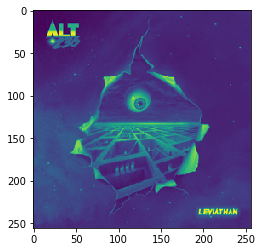

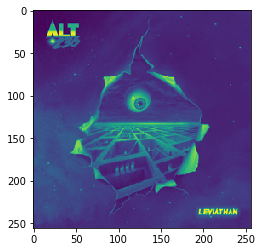

In [9]:
size = 256
SIZE = size, size
image = Image.open("/content/drive/My Drive/Data/LEVIATHAN.jpg").convert('L')
image.thumbnail(SIZE)

npImage=np.array(image,float)
plt.imshow(npImage)
plt.show()

npImageQ = transformInv2DQNL(transformDirect2DQNL(npImage,1),1)


plt.imshow(npImageQ)
plt.show()

In [11]:

print(npImage,'\n')
print(transformInv2DQNL(transformDirect2DQNL(npImage,1),1))


[[ 8.  6.  6. ... 33. 32. 35.]
 [ 7.  5.  6. ... 30. 32. 34.]
 [ 7.  6.  6. ... 30. 32. 33.]
 ...
 [38. 35. 34. ... 32. 31. 31.]
 [41. 35. 35. ... 29. 28. 30.]
 [38. 38. 40. ... 31. 29. 31.]] 

[[ 8.  6.  6. ... 33. 32. 35.]
 [ 7.  5.  6. ... 30. 32. 34.]
 [ 7.  6.  6. ... 30. 32. 33.]
 ...
 [38. 35. 34. ... 32. 31. 31.]
 [41. 35. 35. ... 29. 28. 30.]
 [38. 38. 40. ... 31. 29. 31.]]


##Exercice 4 Bruit Gaussien

In [0]:
from scipy.ndimage import gaussian_filter

def seuilH(x,T):
	y= np.copy(x)
	y[np.absolute(y)<=T]=0
	return y

def seuilS(x,T):
  y= np.copy(x)
  y[np.absolute(y)<=T]=0
  y[np.absolute(y)>T]=y[np.absolute(y)>T]-T
  return y

def seuillage(A,s):
    N = len(A)
    y = np.zeros((N,N))
    v = np.sqrt(np.var(A))

    for i in range(N):
        y[i,:] = seuilS(A[i,:],s)
    return y

def seuillage2(A,s): #n'affiche pas S
    N = len(A)
    y = np.zeros((N,N))
    v = np.sqrt(np.var(A))

    for i in range(N):
        y[i,:] = seuilH(A[i,:],s)
    return y

Image avec du bruit


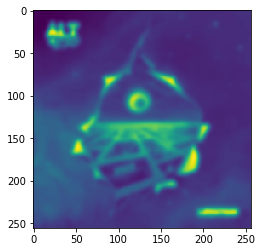

Image corriger avec un seuil dou de  2.8589748430923208


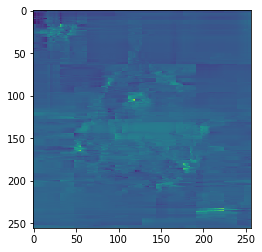

Image corriger avec un seuil dur de  2.8589748430923208


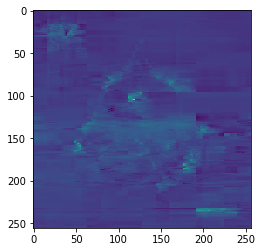

In [18]:
npImageG = gaussian_filter(npImage, sigma=2.5)



print('Image avec du bruit')
plt.imshow(npImageG, interpolation='nearest')
plt.show()

npImageGQ = transformDirect2DQNL(npImageG,1)

N = len(npImageGQ)
v = np.sqrt(np.var(npImageGQ))
s = (((np.sqrt(math.log2(N))))*v)

npImageGQS = seuillage(npImageGQ,s) #seuil dou
npImageGQD = seuillage2(npImageGQ,s) #seuil dur

print('Image corriger avec un seuil dou de ',s)
plt.imshow(transformInv2DQNL(npImageGQS,1), interpolation='nearest')
plt.show()

print('Image corriger avec un seuil dur de ',s)
plt.imshow(transformInv2DQNL(npImageGQD,1), interpolation='nearest')
plt.show()

##Exercice 5: Implementation de l'Etude numérique de la qualité

In [21]:
def normeL2(A,B):
    if len(A)!=len(B):
        print("Les deux vecteurs on des tailles différente")
        return
    else:
        n=len(A)
        v=0
        for i in range(n):
          for j in range(n):
            v=v + np.square(np.absolute(A[i,j]-B[i,j]))
        v= np.sqrt(v)
        return v

npImageG = gaussian_filter(npImage, sigma=2.5)

npImageGQ = transformDirect2DQNL(npImageG,1)

N = len(npImageGQ)
v = np.sqrt(np.var(npImageGQ))
s = (((np.sqrt(math.log2(N))))*v)



npImageGQS = transformInv2DQNL(seuillage(npImageGQ,s),1) #seuil dou
npImageGQD = transformInv2DQNL(seuillage2(npImageGQ,s),1) #seuil dur

print(normeL2(npImage,npImageGQS))
print(normeL2(npImage,npImageGQD))

7682.6337115911965
6714.957644995291


#Exercice 6: Etude numérique de l'erreur

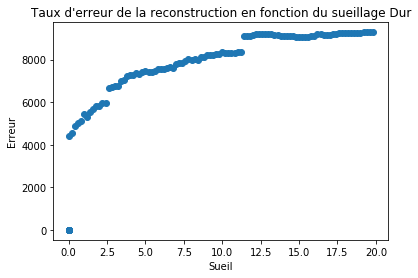

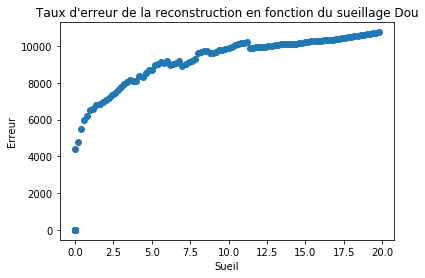

In [25]:
npImageGQ = transformDirect2DQNL(npImageG,1)

t = np.zeros((250))
stQNL = np.zeros((250))

for i in range(100):
  #print(i)
  t[i] = i*0.2
  stQNL[i] = normeL2(npImage, transformInv2DQNL(seuillage2(npImageGQ,i*0.2),1))

plt.scatter(t,stQNL)
plt.title('Taux d\'erreur de la reconstruction en fonction du sueillage Dur')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

t = np.zeros((250))
stQNL = np.zeros((250))

for i in range(100):
  #print(i)
  t[i] = i*0.2
  stQNL[i] = normeL2(npImage, transformInv2DQNL(seuillage(npImageGQ,i*0.2),1))

plt.scatter(t,stQNL)
plt.title('Taux d\'erreur de la reconstruction en fonction du sueillage Dou')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()